# 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# 데이터셋 불러오기

#### 문제상황 및 해결
 - ipynb 실행 후 파일이동하여 경로변경
   -> 'test.csv' 로 커널이 현재 경로를 제대로 인식하지 못하였음
 - (해결방법) 파일의 경로 점검 및 파이썬(커널) 재시작 

In [2]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# EDA (데이터 탐색)

#### EDA
  - 실습 시 EDA는 데이터 구조를 살펴보는 수준으로 실시했습니다.
  - 각 컬럼별로 시각화, 합성변수 생성, 텍스트 분할을 통한 의미 추출 등등 다양한 방법이 있습니다.

In [6]:
x = pd.concat([train,test], axis = 0)
# survived를 맨 뒤로 옮겨주자
x = x[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


In [7]:
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
type(x['Pclass']), type(x)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [10]:
x['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [11]:
x.isnull().sum() #true인 것들을 다 더해줘요. 1

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [12]:
import seaborn as sns

<Axes: >

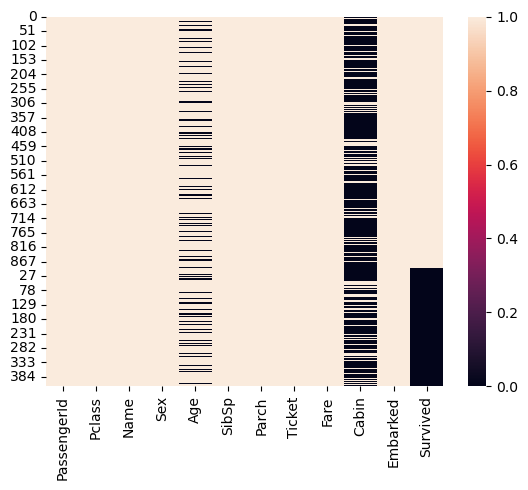

In [13]:
sns.heatmap(x.notnull())   # 실습과 달리 test, train셋의 위 아래 위치를 바꾸어주었습니다. x 정의하는 부분 참조. 

In [14]:
x.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [15]:
drop_col = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived']
num_col  = ['Age', 'SibSp', 'Parch',  'Fare']
cat_col  = ['Pclass', 'Sex', 'Embarked']

In [16]:

x['Embarked'].nunique(), x['Embarked'].unique()

(3, array(['S', 'C', 'Q', nan], dtype=object))

In [17]:
drop_col, num_col, cat_col

(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'],
 ['Age', 'SibSp', 'Parch', 'Fare'],
 ['Pclass', 'Sex', 'Embarked'])

# 데이터 전처리

In [18]:
x_train = train[num_col + cat_col]
x_train

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked
0,22.0,1,0,7.2500,3,male,S
1,38.0,1,0,71.2833,1,female,C
2,26.0,0,0,7.9250,3,female,S
3,35.0,1,0,53.1000,1,female,S
4,35.0,0,0,8.0500,3,male,S
...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,2,male,S
887,19.0,0,0,30.0000,1,female,S
888,NaN,1,2,23.4500,3,female,S
889,26.0,0,0,30.0000,1,male,C


In [19]:
x_test = test[num_col + cat_col]
x_test

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked
0,34.5,0,0,7.8292,3,male,Q
1,47.0,1,0,7.0000,3,female,S
2,62.0,0,0,9.6875,2,male,Q
3,27.0,0,0,8.6625,3,male,S
4,22.0,1,1,12.2875,3,female,S
...,...,...,...,...,...,...,...
413,NaN,0,0,8.0500,3,male,S
414,39.0,0,0,108.9000,1,female,C
415,38.5,0,0,7.2500,3,male,S
416,NaN,0,0,8.0500,3,male,S


In [20]:
y_train = train['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## 범주형 변수 처리

* note
- 원핫 인코더의 sparse VS sparse_output 관련
``` python
ohe = OneHotEncoder(sparse=False)
ohe = OneHotEncoder(sparse_output=False)
```
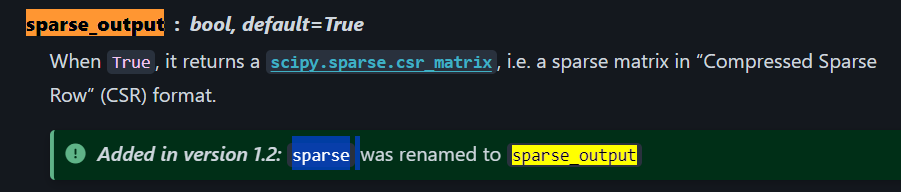
- sklearn의 버전 차이에 따른 것으로 동일한 옵션입니다.
  - ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(x_train[cat_col])
x_train_ohe = ohe.transform(x_train[cat_col])
x_train_ohe = pd.DataFrame(x_train_ohe, columns=ohe.get_feature_names_out())


x_test_ohe = ohe.transform(x_test[cat_col])
x_test_ohe = pd.DataFrame(x_test_ohe, columns=ohe.get_feature_names_out())
x_train_ohe, x_test_ohe

(     Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  Embarked_C  \
 0         0.0       0.0       1.0         0.0       1.0         0.0   
 1         1.0       0.0       0.0         1.0       0.0         1.0   
 2         0.0       0.0       1.0         1.0       0.0         0.0   
 3         1.0       0.0       0.0         1.0       0.0         0.0   
 4         0.0       0.0       1.0         0.0       1.0         0.0   
 ..        ...       ...       ...         ...       ...         ...   
 886       0.0       1.0       0.0         0.0       1.0         0.0   
 887       1.0       0.0       0.0         1.0       0.0         0.0   
 888       0.0       0.0       1.0         1.0       0.0         0.0   
 889       1.0       0.0       0.0         0.0       1.0         1.0   
 890       0.0       0.0       1.0         0.0       1.0         0.0   
 
      Embarked_Q  Embarked_S  Embarked_nan  
 0           0.0         1.0           0.0  
 1           0.0         0.0           0.0  

In [22]:
x_train_after = pd.concat([x_train[num_col], x_train_ohe], axis=1)

x_test_after = pd.concat([x_test[num_col], x_test_ohe], axis=1)
x_train_after, x_test_after

(      Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
 0    22.0      1      0   7.2500       0.0       0.0       1.0         0.0   
 1    38.0      1      0  71.2833       1.0       0.0       0.0         1.0   
 2    26.0      0      0   7.9250       0.0       0.0       1.0         1.0   
 3    35.0      1      0  53.1000       1.0       0.0       0.0         1.0   
 4    35.0      0      0   8.0500       0.0       0.0       1.0         0.0   
 ..    ...    ...    ...      ...       ...       ...       ...         ...   
 886  27.0      0      0  13.0000       0.0       1.0       0.0         0.0   
 887  19.0      0      0  30.0000       1.0       0.0       0.0         1.0   
 888   NaN      1      2  23.4500       0.0       0.0       1.0         1.0   
 889  26.0      0      0  30.0000       1.0       0.0       0.0         0.0   
 890  32.0      0      0   7.7500       0.0       0.0       1.0         0.0   
 
      Sex_male  Embarked_C  Embarked_Q  Embarked_S

## 결측값 처리

In [23]:
x_train_after_fillna = x_train_after.fillna(method="ffill")
x_test_after_fillna = x_test_after.fillna(method="ffill")
x_train_after_fillna, x_test_after_fillna

C:\Users\pooko\AppData\Local\Temp\ipykernel_9804\1073369454.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_train_after_fillna = x_train_after.fillna(method="ffill")
C:\Users\pooko\AppData\Local\Temp\ipykernel_9804\1073369454.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_test_after_fillna = x_test_after.fillna(method="ffill")


(      Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
 0    22.0      1      0   7.2500       0.0       0.0       1.0         0.0   
 1    38.0      1      0  71.2833       1.0       0.0       0.0         1.0   
 2    26.0      0      0   7.9250       0.0       0.0       1.0         1.0   
 3    35.0      1      0  53.1000       1.0       0.0       0.0         1.0   
 4    35.0      0      0   8.0500       0.0       0.0       1.0         0.0   
 ..    ...    ...    ...      ...       ...       ...       ...         ...   
 886  27.0      0      0  13.0000       0.0       1.0       0.0         0.0   
 887  19.0      0      0  30.0000       1.0       0.0       0.0         1.0   
 888  19.0      1      2  23.4500       0.0       0.0       1.0         1.0   
 889  26.0      0      0  30.0000       1.0       0.0       0.0         0.0   
 890  32.0      0      0   7.7500       0.0       0.0       1.0         0.0   
 
      Sex_male  Embarked_C  Embarked_Q  Embarked_S

# 모델 학습

In [24]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [25]:
model.fit(x_train_after_fillna, y_train)


RandomForestClassifier()

# 결과예측

In [26]:
y_pred = model.predict(x_test_after_fillna)
result = pd.DataFrame(y_pred, columns=['Survived'])
result = pd.concat([test['PassengerId'], result], axis = 1)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 제출용 csv 저장

In [27]:
result.to_csv('pred_titanic.csv', index=False)

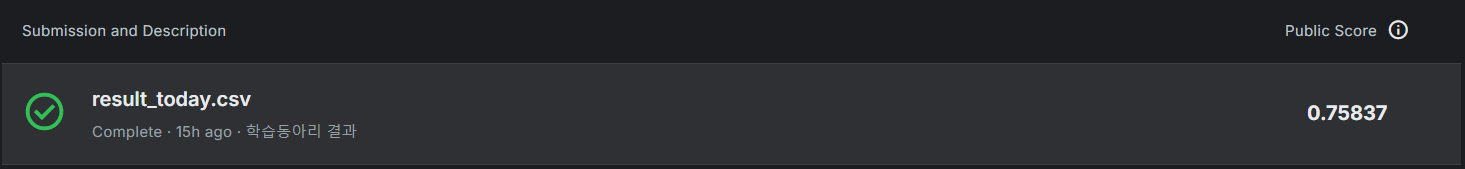